## Import Library

In [1]:
import numpy as np
import pandas as pd

### Ambil Data

In [2]:
df = pd.read_csv("datasets/bank-full.csv", sep=";")

<b>Keterangan</b>

Menambahkan parameter sep=";", karena tipe file mempunyai ekstensi excel comma delimited

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

<b>Keterangan</b>

dari penggunaan .shape() dapat diketahui bahwa data yang dimiliki terdiri dari 45.211 banyak baris data dan 17 banyak kolom data

## Data Pre-proccessing

### Mengganti nama kolom

<b>Keterangan</b>

Output Variable (desired target):

y : has the client subscribed a term deposit? (binary: "<b>yes</b>", "<b>no</b>")

In [5]:
df_baru = df.rename(columns={"y":"deposit"})

In [6]:
# Cek Data
df_baru

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


<b>Keterangan</b>

Kolom y telah berubah menjadi deposit, sesuai dengan desired target yang diinginkan

### Cek Nilai Null

In [7]:
df_baru.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

<b>Keterangan</b>

Data tidak ada bernilai null, selanjutnya adalah melakukan Logistic Regression

### Import Library

In [8]:
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

import seaborn as sns
%matplotlib inline

In [9]:
# Copy Data

df_olah_data = df_baru.copy()

In [10]:
df_olah_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<b>Keterangan</b>

Mengambil data dengan tipe data int, yaitu:
* age
* balance
* day
* campaign
* pdays
* previous

dan melakukan standarisasi data

<b>Catatan</b>

duration tidak diikutsertakan dalam proses standarisasi data, karena data yang ada pada kolom duration sangat berdampak sekali dengan hasil output nantinya

In [11]:
scaler = StandardScaler()

data_num = [
    "age",
    "balance",
    "day",
    "campaign",
    "pdays",
    "previous"
]

df_olah_data[data_num] = scaler.fit_transform(df_olah_data[data_num])

In [12]:
# Cek Data

df_olah_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1.606965,management,married,tertiary,no,0.256419,yes,no,unknown,-1.298476,may,261,-0.569351,-0.411453,-0.25194,unknown,no
1,0.288529,technician,single,secondary,no,-0.437895,yes,no,unknown,-1.298476,may,151,-0.569351,-0.411453,-0.25194,unknown,no
2,-0.747384,entrepreneur,married,secondary,no,-0.446762,yes,yes,unknown,-1.298476,may,76,-0.569351,-0.411453,-0.25194,unknown,no
3,0.571051,blue-collar,married,unknown,no,0.047205,yes,no,unknown,-1.298476,may,92,-0.569351,-0.411453,-0.25194,unknown,no
4,-0.747384,unknown,single,unknown,no,-0.447091,no,no,unknown,-1.298476,may,198,-0.569351,-0.411453,-0.25194,unknown,no


<b>Keterangan</b>

.fit_transform() menyesuaikan instance StandardScaler ke array yang diteruskan sebagai argumen, mengubah array dan mengembalikan array standar yang baru.

In [13]:
df_olah_data[data_num].describe()

,age,balance,day,campaign,pdays,previous
count,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04
mean,5.222844e-16,3.070663e-15,-9.219436e-15,1.254699e-14,-1.395817e-13,1.355210e-13
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-2.159994e+00,-3.081149e+00,-1.779108e+00,-5.693506e-01,-4.114531e-01,-2.519404e-01
25%,-7.473845e-01,-4.237719e-01,-9.380027e-01,-5.693506e-01,-4.114531e-01,-2.519404e-01
50%,-1.823406e-01,-3.002800e-01,2.326031e-02,-2.465603e-01,-4.114531e-01,-2.519404e-01
75%,6.652252e-01,2.158743e-02,6.240497e-01,7.622994e-02,-4.114531e-01,-2.519404e-01
max,5.091402e+00,3.309478e+01,1.825628e+00,1.944365e+01,8.297431e+00,1.191360e+02


In [14]:
df_olah_data[data_num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,5.222844e-16,1.000011,-2.159994,-0.747384,-0.182341,0.665225,5.091402
balance,45211.0,3.070663e-15,1.000011,-3.081149,-0.423772,-0.300280,0.021587,33.094776
day,45211.0,-9.219436e-15,1.000011,-1.779108,-0.938003,0.023260,0.624050,1.825628
campaign,45211.0,1.254699e-14,1.000011,-0.569351,-0.569351,-0.246560,0.076230,19.443647
pdays,45211.0,-1.395817e-13,1.000011,-0.411453,-0.411453,-0.411453,-0.411453,8.297431
previous,45211.0,1.355210e-13,1.000011,-0.251940,-0.251940,-0.251940,-0.251940,119.135982


In [15]:
df_olah_data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


## Visualisasi Data

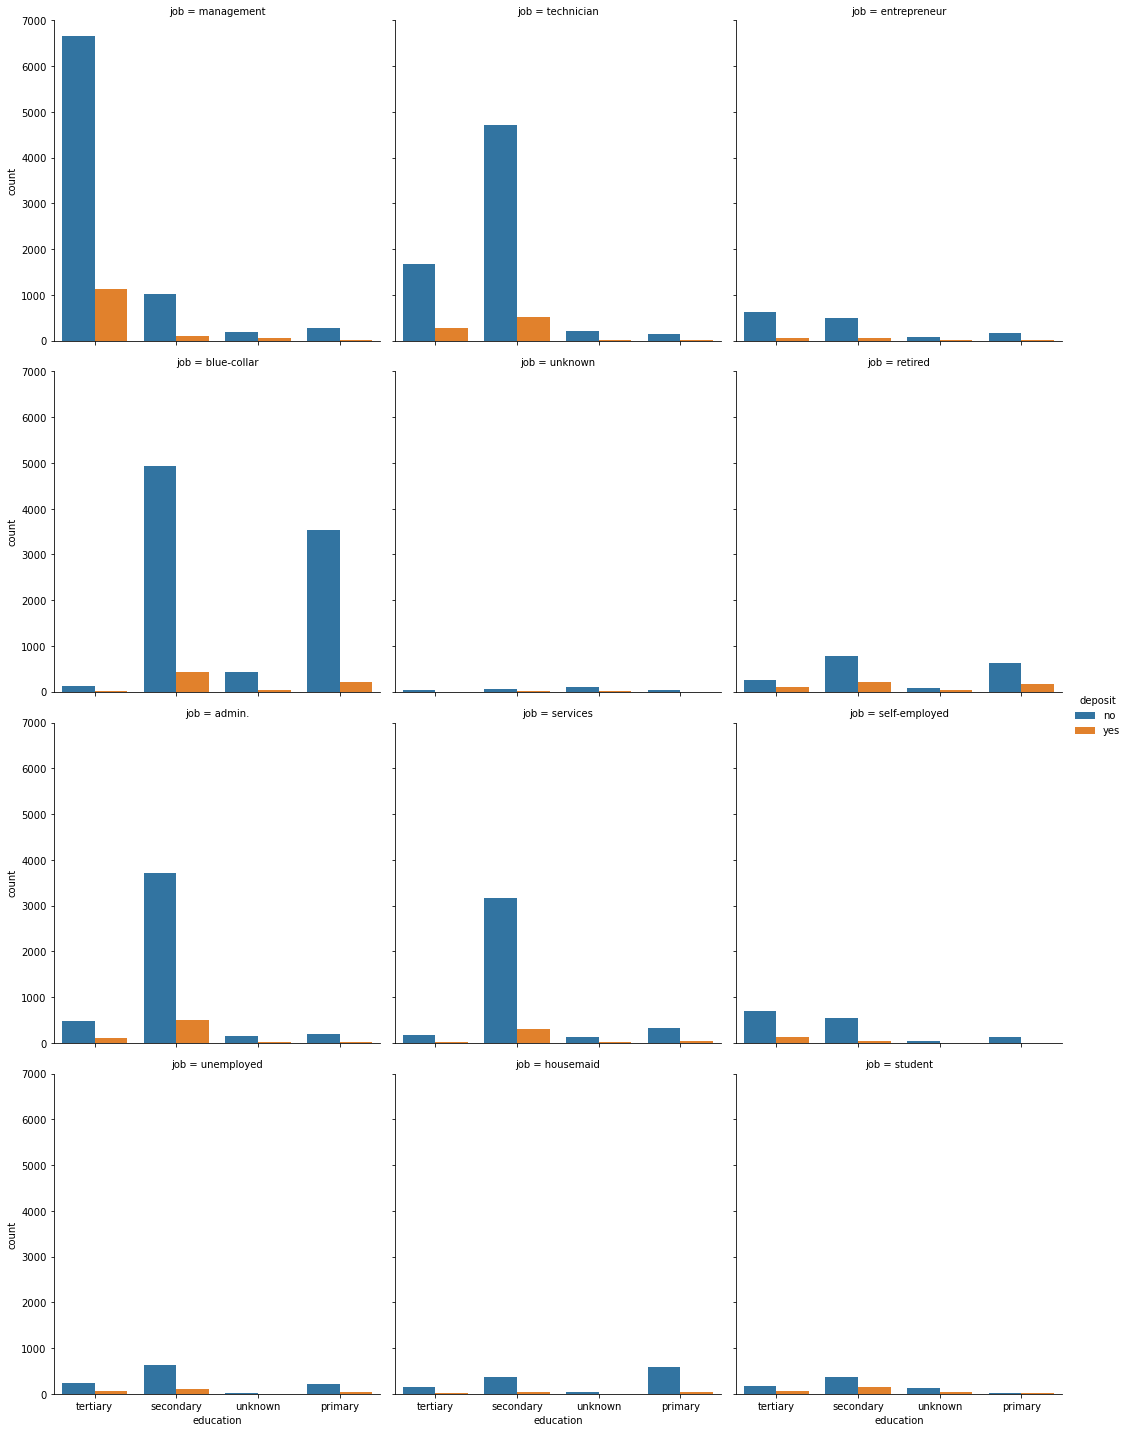

In [16]:
sns.catplot(x='education',hue="deposit", col="job",kind='count',data=df_baru, col_wrap=3);

<b>Keterangan</b>

Dari data job untuk management dan pendidikan merupakan tertiary lebih banyak menghasilkan grafik yang menunjukkan tidak melakukan deposit

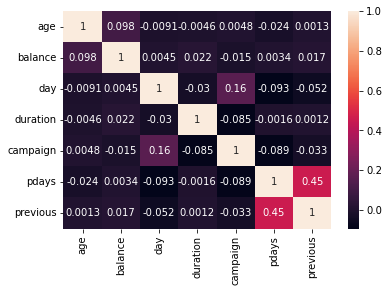

In [17]:
sns.heatmap(df_olah_data.corr(), annot=True);

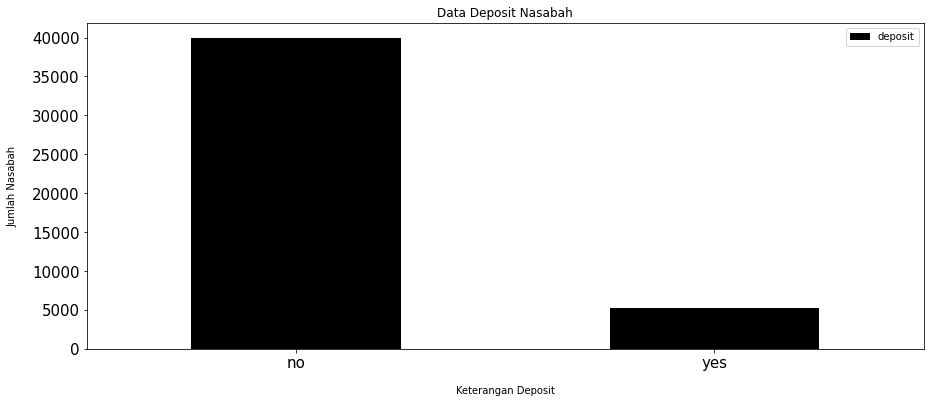

In [18]:
df_baru["deposit"].value_counts().plot(kind="bar", figsize=(15,6), color="black")

plt.xticks(rotation=0)
plt.tick_params(axis="both", labelsize=15)
plt.title("Data Deposit Nasabah")
plt.ylabel("Jumlah Nasabah", labelpad=15)
plt.xlabel("Keterangan Deposit", labelpad=15)

plt.legend()

plt.show()

## Classification

### Encoder Data using get_dummies()

In [19]:
df_enc_dum = pd.get_dummies(df_olah_data, columns=["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"])

# Cek Data
df_enc_dum

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,0.256419,-1.298476,261,-0.569351,-0.411453,-0.251940,no,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.288529,-0.437895,-1.298476,151,-0.569351,-0.411453,-0.251940,no,0,0,...,0,0,1,0,0,0,0,0,0,1
2,-0.747384,-0.446762,-1.298476,76,-0.569351,-0.411453,-0.251940,no,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0.571051,0.047205,-1.298476,92,-0.569351,-0.411453,-0.251940,no,0,1,...,0,0,1,0,0,0,0,0,0,1
4,-0.747384,-0.447091,-1.298476,198,-0.569351,-0.411453,-0.251940,no,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,0.143418,977,0.076230,-0.411453,-0.251940,yes,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,2.831227,0.120447,0.143418,456,-0.246560,-0.411453,-0.251940,yes,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,2.925401,1.429593,0.143418,1127,0.721811,1.436189,1.050473,yes,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,1.512791,-0.228024,0.143418,508,0.399020,-0.411453,-0.251940,no,0,1,...,0,0,0,1,0,0,0,0,0,1


<b>Keterangan</b>

Selanjutnya adalah mengubah isi data deposit dengan (1 dan 0) agar bisa digunakan selanjutnya untuk data train dan data test

#### Mengganti data deposit

In [20]:
df_enc_dum.deposit.replace(("yes", "no"), (1, 0), inplace=True)

df_enc_dum

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,0.256419,-1.298476,261,-0.569351,-0.411453,-0.251940,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.288529,-0.437895,-1.298476,151,-0.569351,-0.411453,-0.251940,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,-0.747384,-0.446762,-1.298476,76,-0.569351,-0.411453,-0.251940,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0.571051,0.047205,-1.298476,92,-0.569351,-0.411453,-0.251940,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,-0.747384,-0.447091,-1.298476,198,-0.569351,-0.411453,-0.251940,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,0.143418,977,0.076230,-0.411453,-0.251940,1,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,2.831227,0.120447,0.143418,456,-0.246560,-0.411453,-0.251940,1,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,2.925401,1.429593,0.143418,1127,0.721811,1.436189,1.050473,1,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,1.512791,-0.228024,0.143418,508,0.399020,-0.411453,-0.251940,0,0,1,...,0,0,0,1,0,0,0,0,0,1


### Memisahkan Feature dan Target

#### Feature

In [21]:
df_feature = df_enc_dum.drop("deposit", axis=1)

#### Target

In [22]:
df_target = df_enc_dum["deposit"]

### Set Data Training dan Data Testing

In [23]:
data = X_train, X_test, y_train, y_test = train_test_split(
    df_feature,
    df_target,
    test_size=0.3
)

print("Shape Training Feature:", X_train.shape)
print("Shape Testing Feature:", X_test.shape)
print("Shape Training Feature:", y_train.shape)
print("Shape Testing Feature:", y_test.shape)

Shape Training Feature: (31647, 51)
Shape Testing Feature: (13564, 51)
Shape Training Feature: (31647,)
Shape Testing Feature: (13564,)


### Logistic Regression

In [24]:
model = LogisticRegression(solver="liblinear", random_state=0)

In [25]:
model.fit(df_feature, df_target)

LogisticRegression(random_state=0, solver='liblinear')

In [26]:
model = LogisticRegression(solver="liblinear", random_state=0).fit(df_feature, df_target)

In [27]:
model.classes_

array([0, 1], dtype=int64)

In [28]:
print(model.intercept_, model.coef_)

[-0.80924412] [[ 1.24139872e-03  3.88535691e-02  8.07299460e-02  4.18817573e-03
  -2.80919698e-01 -1.42767065e-02  2.22975146e-02  8.32423881e-02
  -2.27404248e-01 -2.73539793e-01 -4.12604431e-01 -7.97433390e-02
   3.37881389e-01 -2.12948698e-01 -1.40445666e-01  4.64376111e-01
  -9.16888067e-02 -9.24674569e-02 -1.63901570e-01 -2.40045440e-01
  -4.21826357e-01 -1.47372324e-01 -4.03675186e-01 -2.24096040e-01
  -2.43912902e-02 -1.57081605e-01 -4.00964519e-01 -4.08279601e-01
  -6.76675490e-02 -7.41576572e-01 -1.91484535e-01 -6.17759585e-01
   3.22138560e-01  1.59148678e-01 -1.29053136e+00 -8.10687203e-02
  -7.73708305e-01  5.34376331e-01 -2.31315735e-01 -1.33015292e+00
  -9.08427662e-01  3.61899461e-01  1.48703503e+00 -4.82068196e-01
  -9.52312955e-01  7.86753724e-01  7.79745826e-01 -7.96346641e-01
  -5.88412429e-01  1.48213116e+00 -9.06616210e-01]]


In [29]:
# Step 4 : Evaluate the Model
model.predict_proba(df_feature)

array([[0.98505032, 0.01494968],
       [0.99019016, 0.00980984],
       [0.99701996, 0.00298004],
       ...,
       [0.02495202, 0.97504798],
       [0.88309944, 0.11690056],
       [0.87155495, 0.12844505]])

In [30]:
model.predict(df_feature)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [31]:
model.score(df_feature, df_target)

print("Hasil Model Score =", round(model.score(df_feature, df_target), 2))

Hasil Model Score = 0.9


In [32]:
confusion_matrix(df_target, model.predict(df_feature))

array([[38941,   981],
       [ 3457,  1832]], dtype=int64)

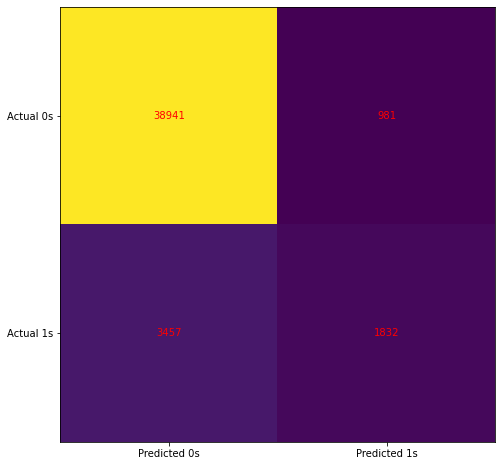

In [33]:
cm = confusion_matrix(df_target, model.predict(df_feature))

fig, ax = plt.subplots(figsize = (8, 8))
ax.imshow(cm)
ax.grid(False)

ax.xaxis.set(ticks = (0, 1), ticklabels=("Predicted 0s", "Predicted 1s"))
ax.yaxis.set(ticks = (0, 1), ticklabels=("Actual 0s", "Actual 1s"))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha = "center", va ="center", color="red")
        
plt.show()

### Logistic Regression - Non Visual

In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
pred_cv = model.predict(X_test)

In [36]:
print(accuracy_score(y_test, pred_cv))
matrix = confusion_matrix(y_test, pred_cv)
print(matrix)

0.8996608670008847
[[11694   268]
 [ 1093   509]]


### Decision Tree 

In [37]:
from sklearn import tree

dt=tree.DecisionTreeClassifier()

dt.fit(X_train, y_train)

pred_cv1 = dt.predict(X_test)

In [38]:
print(accuracy_score(y_test, pred_cv1))
matrix1 = confusion_matrix(y_test, pred_cv1)
print(matrix1)

0.8765850781480389
[[11111   851]
 [  823   779]]


In [39]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree Classifier Object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)


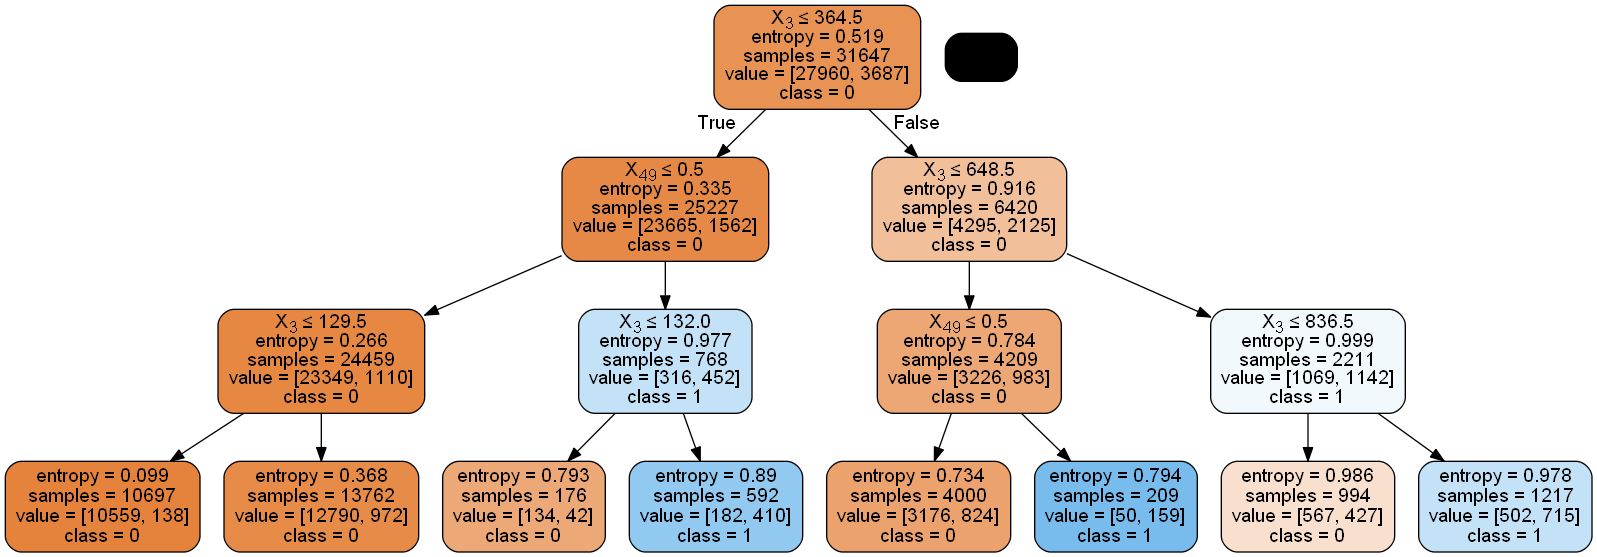

In [40]:
import sklearn.tree as tree
import pydotplus
from six import StringIO
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(
    clf,
    out_file=dot_data,
    # the target names
    class_names=["0", "1"],
    filled=True,
    rounded=True,
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [42]:
pred_cv2 = rf.predict(X_test)

In [43]:
print(accuracy_score(y_test, pred_cv2))
matrix2 = confusion_matrix(y_test, pred_cv2)
print(matrix2)

0.9074019463285167
[[11645   317]
 [  939   663]]


### Support Vector Machine

In [44]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    df_feature, df_target, test_size=0.3, random_state=109) 

In [46]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

pred_cv3 = svm_model.predict(X_test)

print(accuracy_score(y_test, pred_cv3))
matrix3 = confusion_matrix(y_test, pred_cv3)
print(matrix3)

0.8869065172515482
[[11759   195]
 [ 1339   271]]


### Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

pred_cv4 = nb.predict(X_test)

print(accuracy_score(y_test, pred_cv4))
matrix4 = confusion_matrix(y_test, pred_cv4)
print(matrix4)

0.851150103214391
[[10705  1249]
 [  770   840]]


### K-Nearest Neigbhor (KNN)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier()
kNN.fit(X_train, y_train)

pred_cv5 = kNN.predict(X_test)

print(accuracy_score(y_test, pred_cv5))
matrix5 = confusion_matrix(y_test, pred_cv5)
print(matrix5)

0.8823355942199941
[[11543   411]
 [ 1185   425]]


### Result

In [49]:
print("Logistic Regression:", round(accuracy_score(y_test, pred_cv), 3))
print("Decision Tree:", round(accuracy_score(y_test, pred_cv1), 3))
print("Random Forest:", round(accuracy_score(y_test, pred_cv2), 3))
print("SVM:", round(accuracy_score(y_test, pred_cv3), 3))
print("Naive Bayes:", round(accuracy_score(y_test, pred_cv4), 3))
print("KNN:", round(accuracy_score(y_test, pred_cv5), 3))

Logistic Regression: 0.839
Decision Tree: 0.791
Random Forest: 0.826
SVM: 0.887
Naive Bayes: 0.851
KNN: 0.882
